In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from scripts.plot_util import plot_curves

In [2]:
with open("results/linear_sim_results.pkl", "rb") as file:
    linear_results = pkl.load(file)

with open("results/lss_sim_results.pkl", "rb") as file:
    lss_results = pkl.load(file)

with open("results/poly_sim_results.pkl", "rb") as file:
    poly_results = pkl.load(file)

with open("results/hierarchical_lss_sim_results.pkl", "rb") as file:
    hierarchical_lss_results = pkl.load(file)

## Takeaways

Bias
1. FIGS generally has lower bias compared to all other methods
2. All other methods experience high bias given some adversarial generative assumptions

Variance
1. GB stumps generally has lower variance compared to all other methods
2. FIGS variance can be larger than other methods depending on the circumstances
3. For Boolean regression function, variance drops until model is correctly specified, then increases
4. For continuous regression function, variance tends to increase with no. of splits
5. Variance tends to increase as SNR decreases.

MSE
1. FIGS MSE tends to be comparatively worse in low SNR settings.

## Example plots for bias with different DGPs

1. Linear model (s=6, H=0.6)
2. Single boolean interaction (r=4)
3. Hierarchical LSS (m=3, r=2)
4. Hierarchical poly (m=3, r=3)

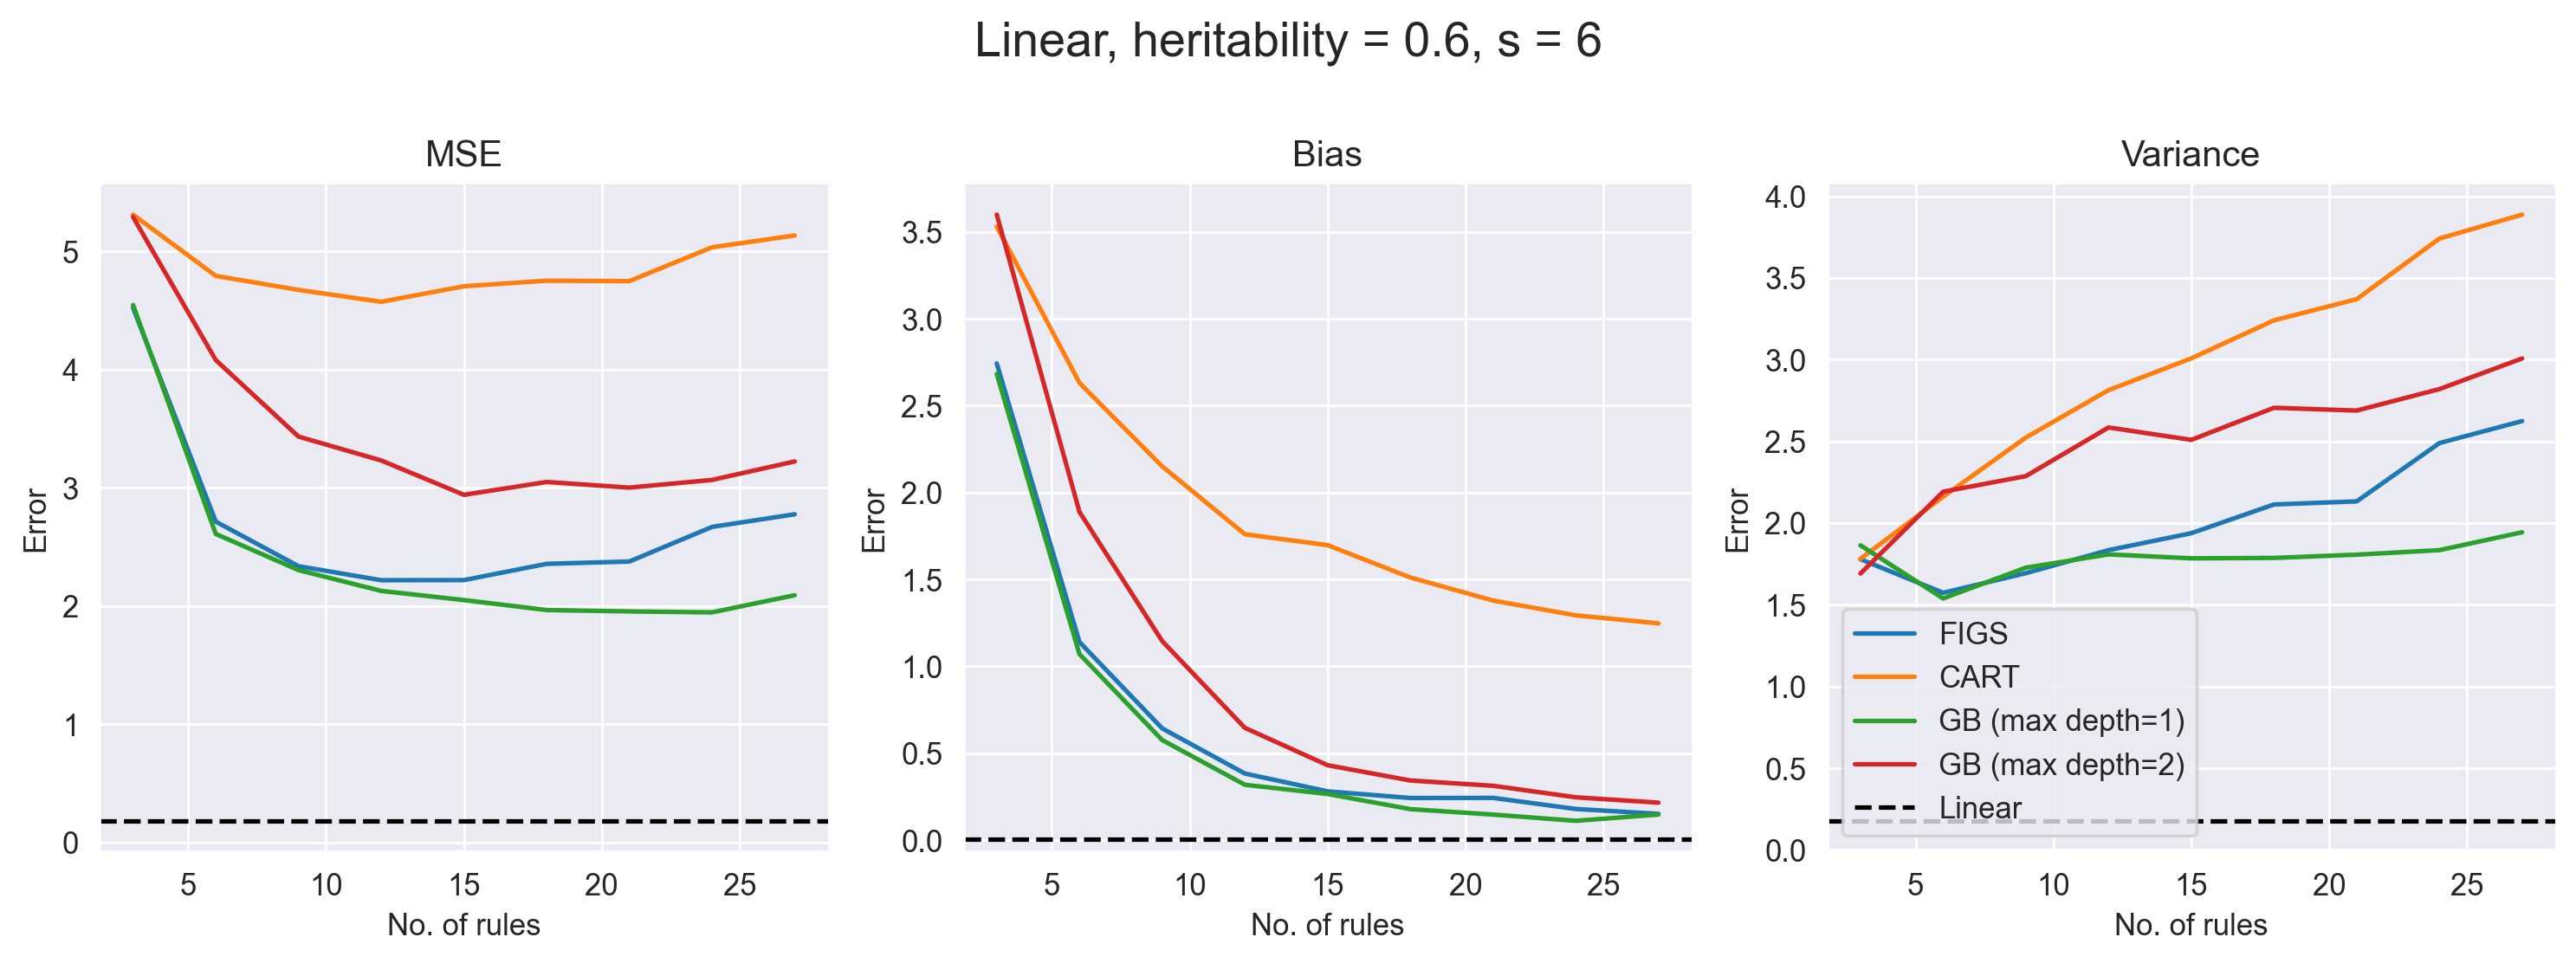

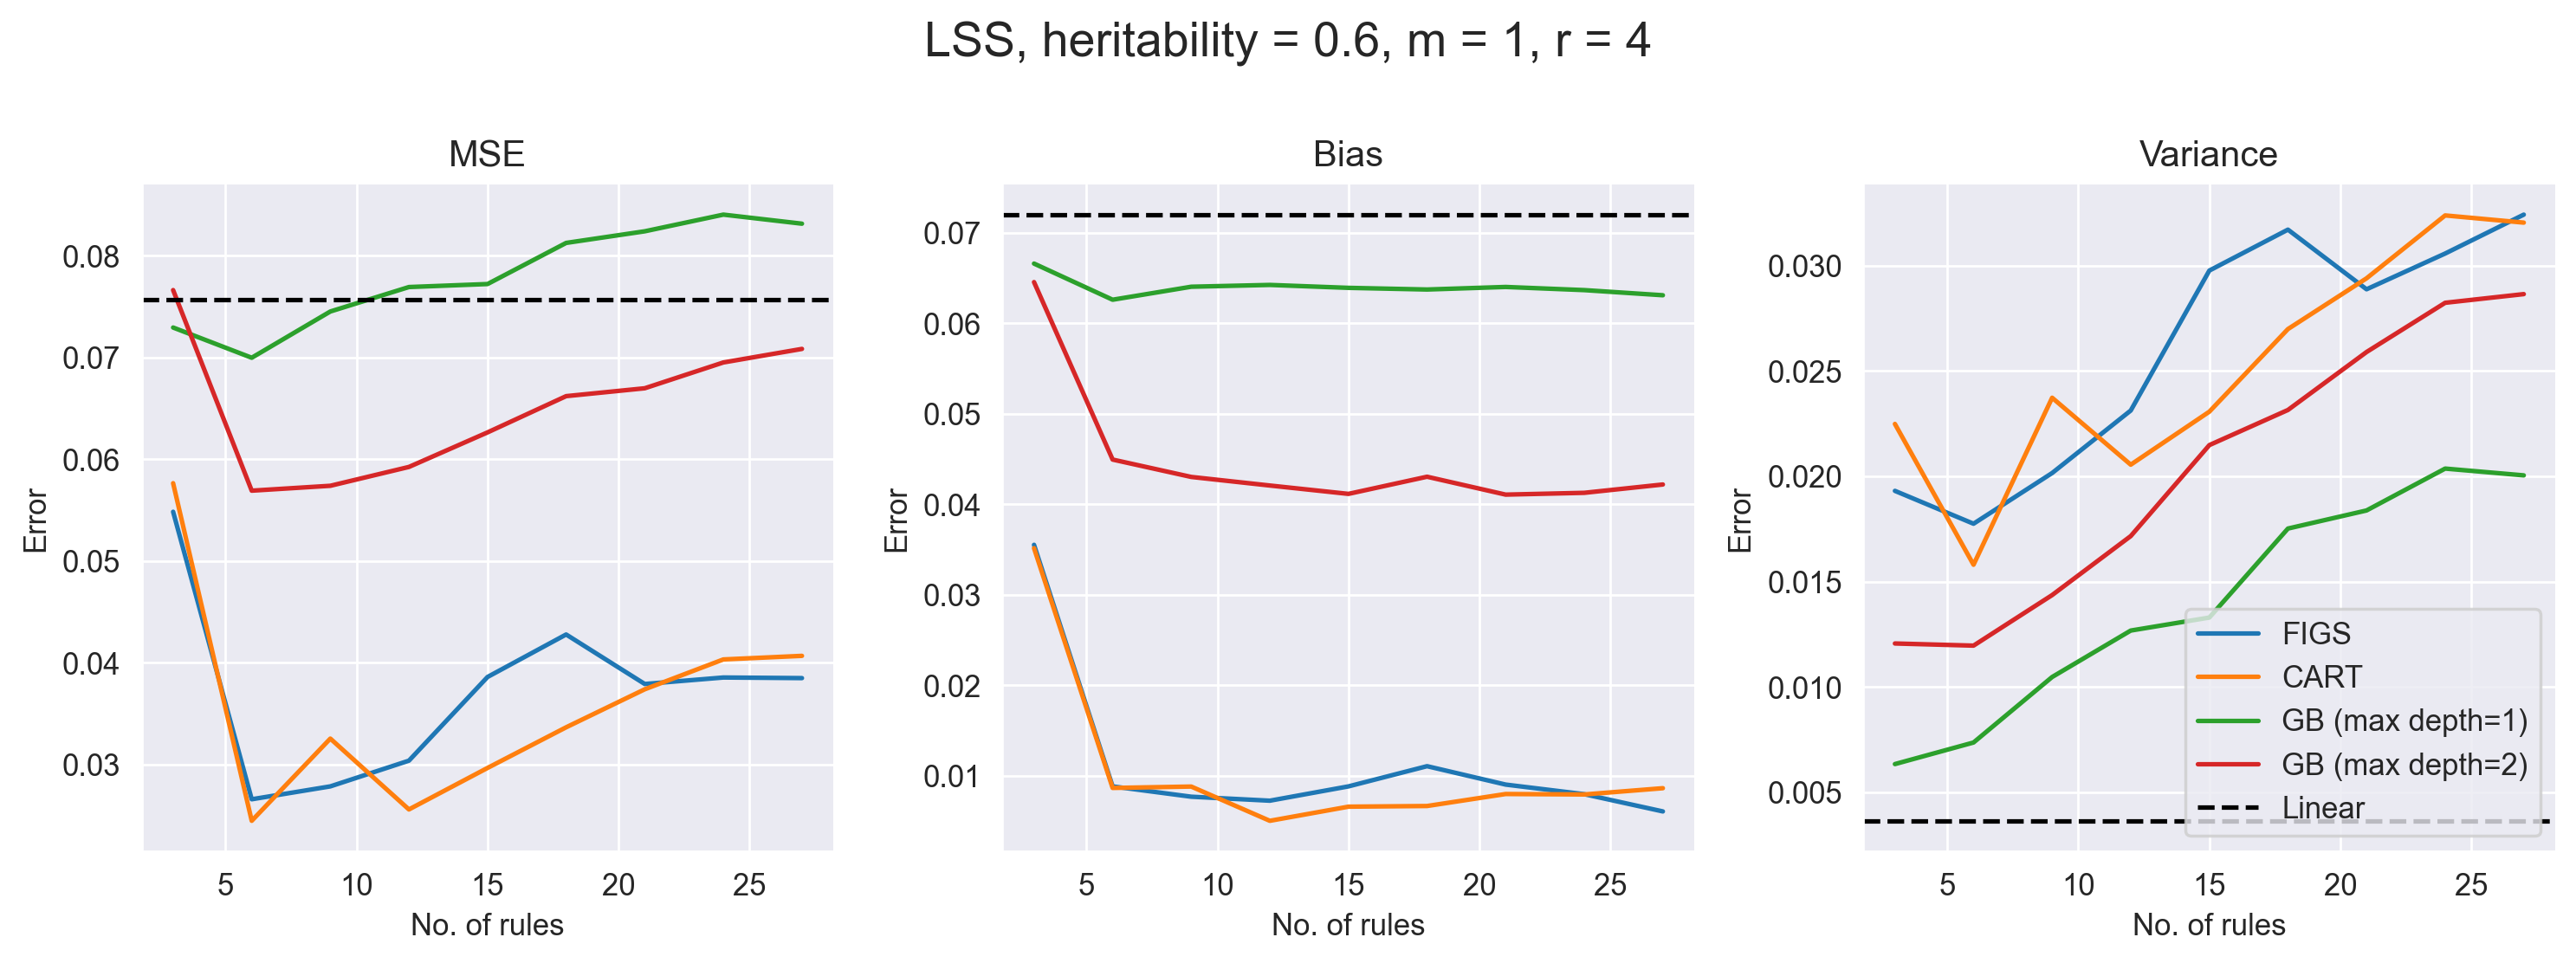

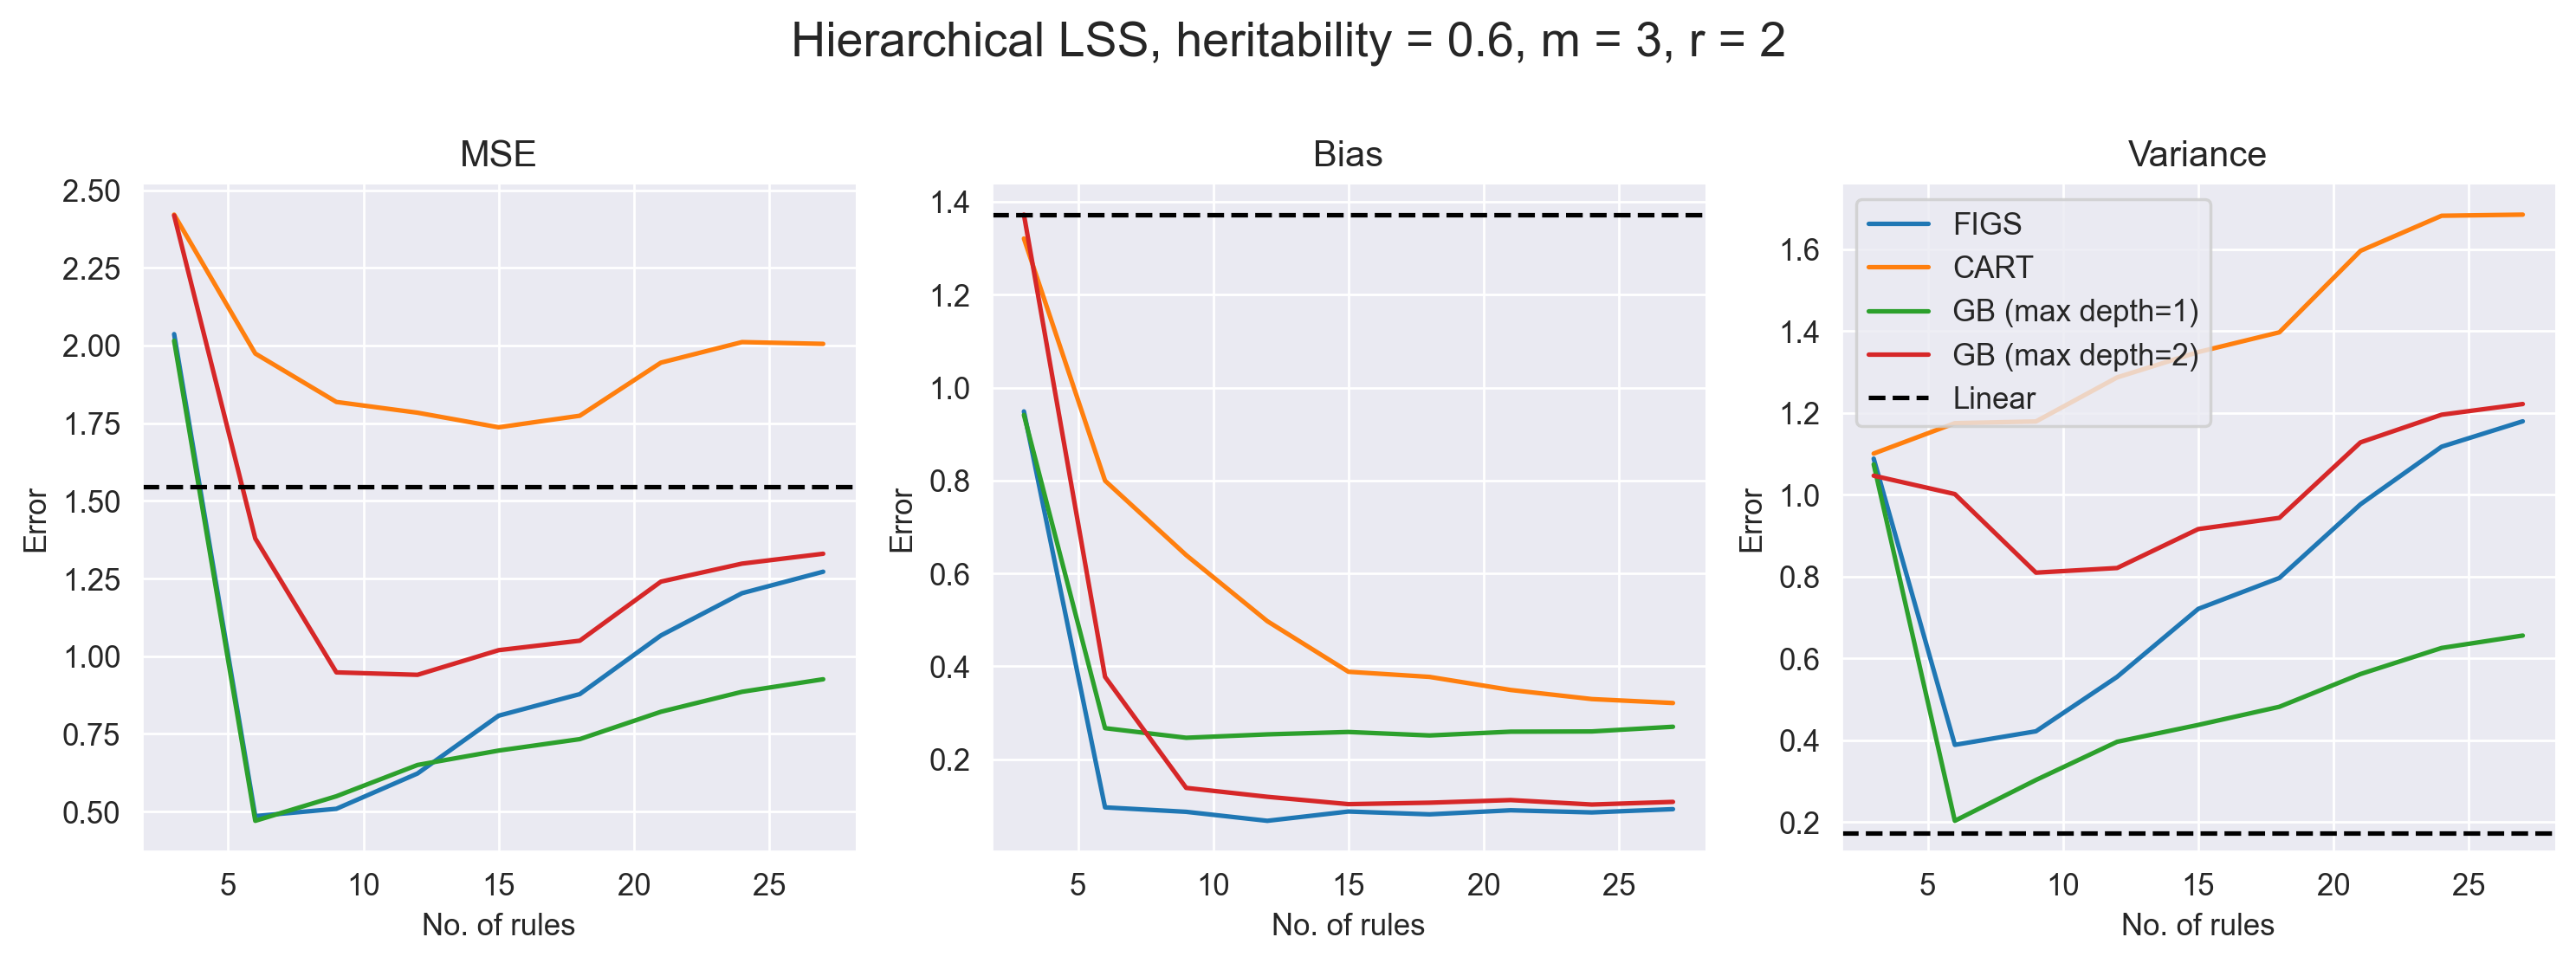

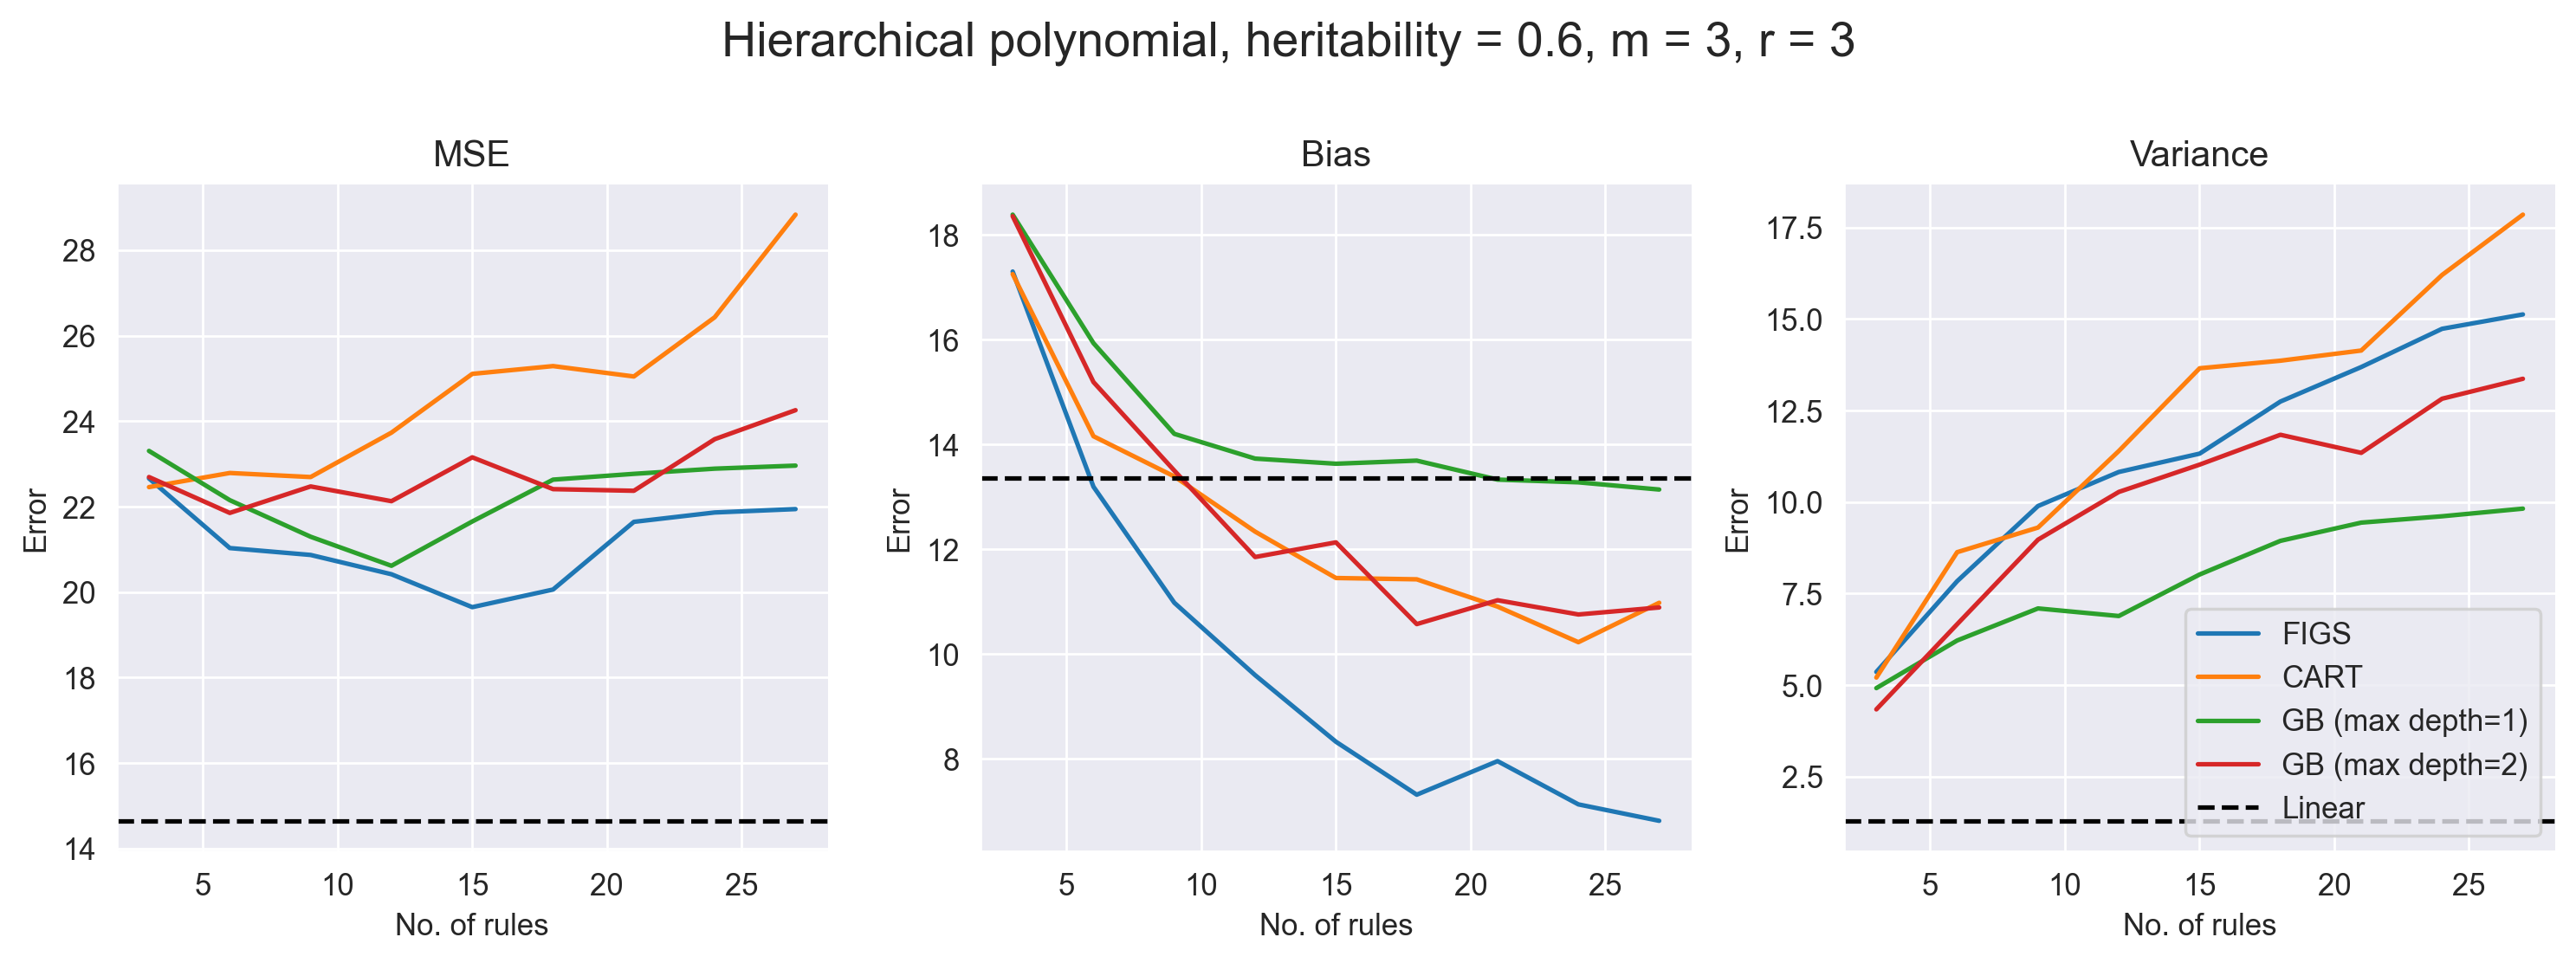

In [3]:
sim1 = [results for results in linear_results if results["s"] == 6 and results["heritability"] == 0.6][0]
sim2 = [results for results in lss_results if results["m"] == 1 and results["r"] == 4 and results["heritability"] == 0.6][0]
sim3 = [results for results in hierarchical_lss_results if results["m"] == 3 and results["r"] == 2 and results["heritability"] == 0.6][0]
sim4 = [results for results in poly_results if results["m"] == 3 and results["r"] == 3 and results["heritability"] == 0.6][0]
sims = [sim1, sim2, sim3, sim4]
names = ["Linear", "LSS", "Hierarchical LSS", "Hierarchical polynomial"]
for sim, name in zip(sims, names):
    plot_curves(sim, name=name)

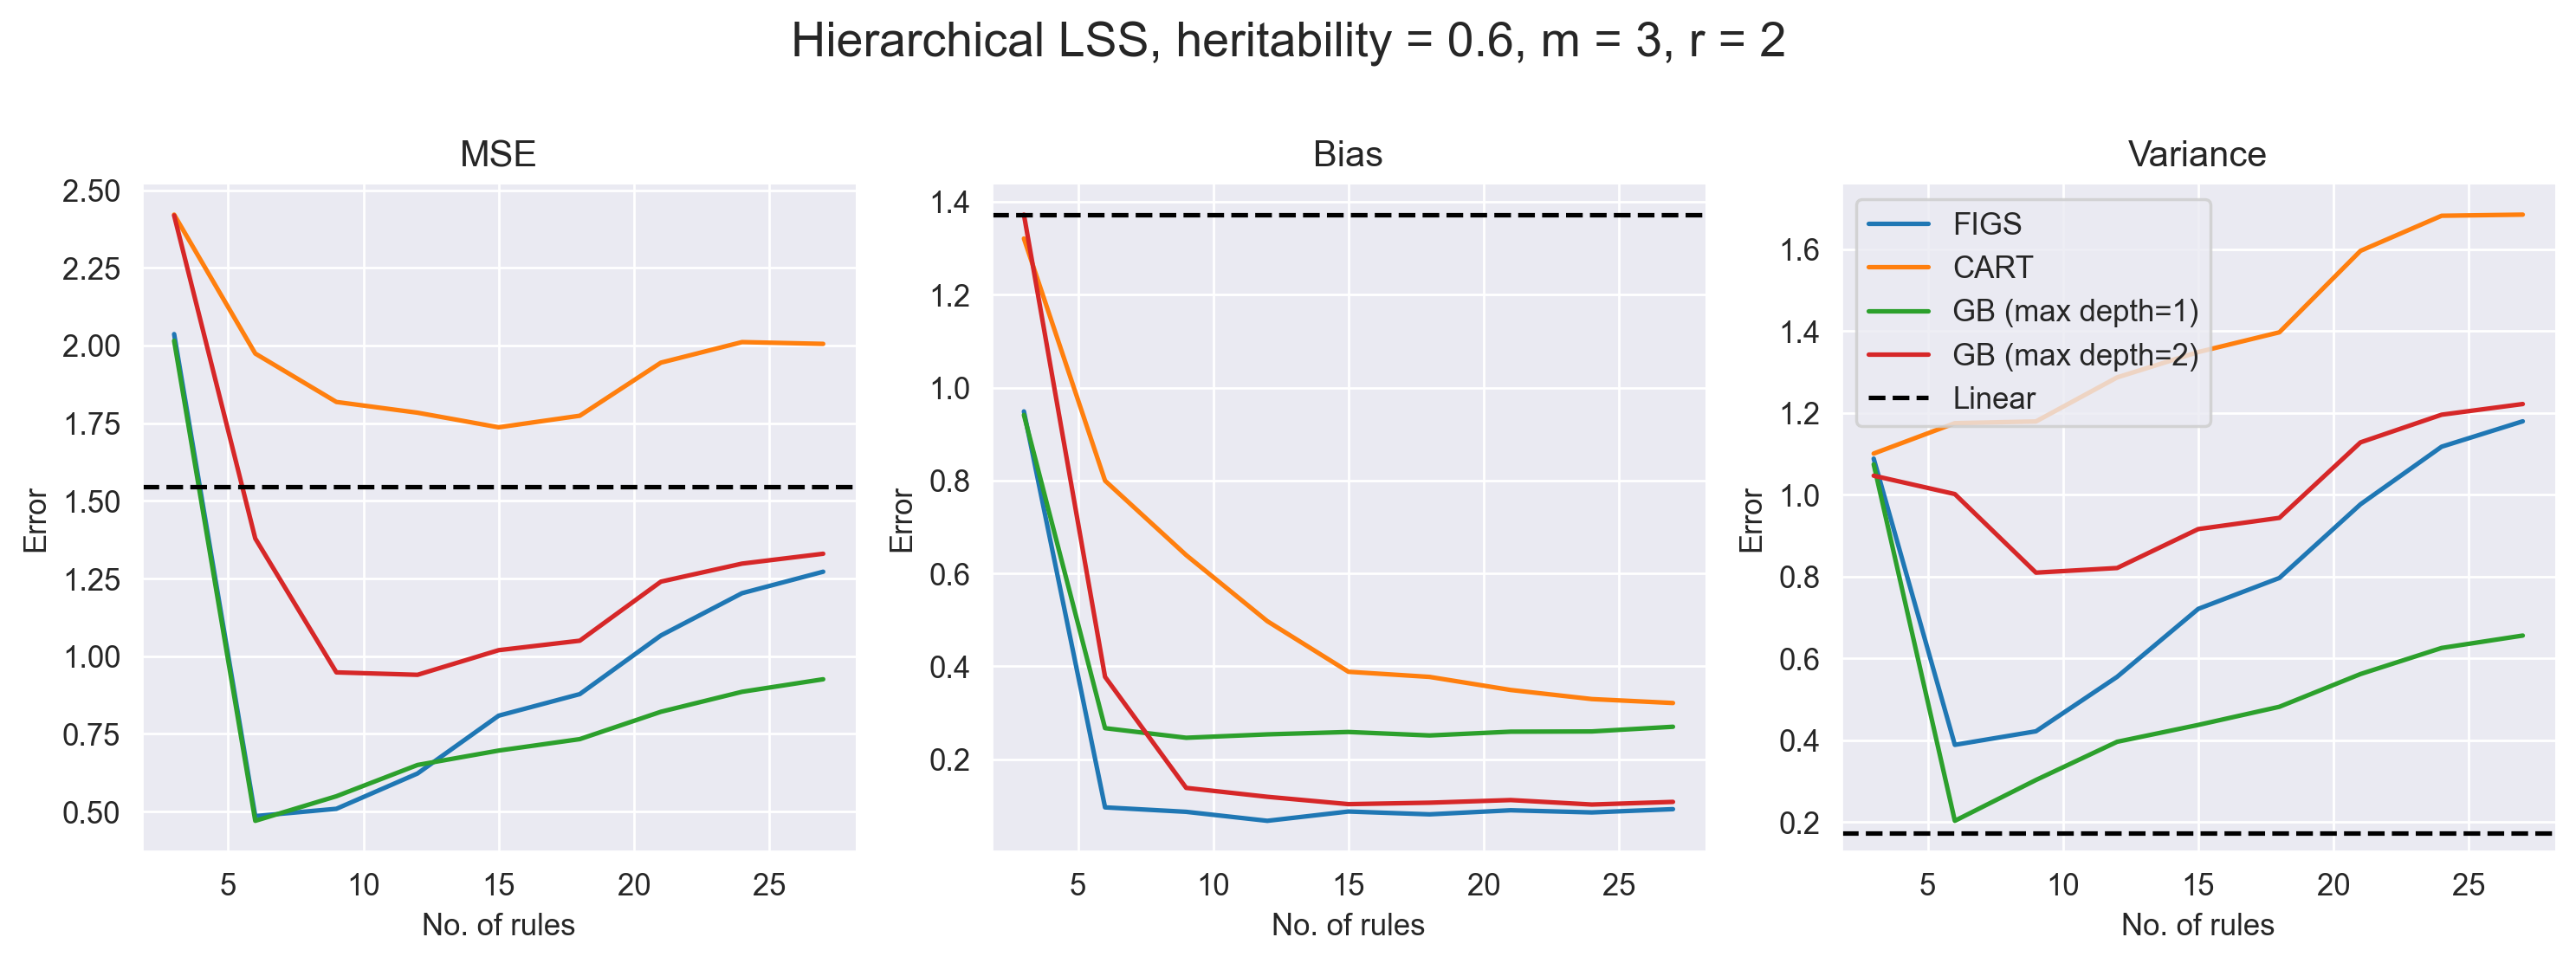

In [4]:
plot_curves(sim3, name="Hierarchical LSS", export=True)